<a href="https://colab.research.google.com/github/LisaCh24/astrodata/blob/main/dark_energy_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np #lets us do math
import matplotlib.pyplot as plt #plot data
import astropy.io.ascii #read the data
import astropy.units as u #units
import astropy.constants as ac #constants

In [ ]:
from google.colab import files #lets us import file from drive (Tonry_2003.vot)
uploaded = files.upload() #upload the file

Saving Tonry_2003.vot to Tonry_2003 (1).vot


In [ ]:
dat = astropy.io.ascii.read("Tonry_2003.vot") #read the data from the file

/usr/local/lib/python3.10/dist-packages/astropy/io/ascii/html.py:91: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  soup = BeautifulSoup("\n".join(lines))


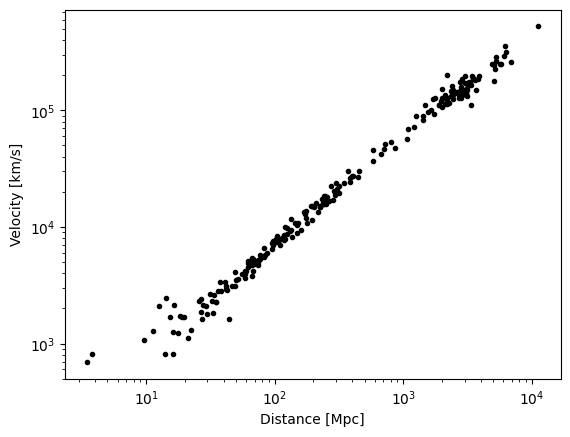

In [ ]:
distance = 10**dat["col8"] / 72.0 * u.mpc #find distance
distance_error = (10**(dat["col8"]+dat["col9"]) - 10**dat["col8"]) / 72.0 * u.mpc #calculate the error
velocity = 10**dat["col7"] * u.km / u.s #find velocity
plt.plot(distance.to(u.mpc).value, velocity.to(u.km / u.s).value, marker=".", color="black", linestyle="none") #plot distance vs velocity
plt.xscale("log") #scale on x axis
plt.yscale("log") #scale on y axis
plt.xlabel("Distance [Mpc]") #label x axis as Distance [Mpc]
plt.ylabel("Velocity [km/s]") #label y axis as Velocity [km/s]
plt.show() #show the graph

In [ ]:
x = distance.to(u.mpc).value #define x as distance with units Mpc
ind = np.where((x > 0) & (x < 700)) #limit 0<x<700 Mpc
z = np.polyfit(distance.to(u.mpc).value[ind], velocity.to(u.km / u.s).value[ind], 1) #make line of best fit (value will be (H_0) *this is not in polynomial form

In [ ]:
p = np.poly1d(z) # convert to polynomail form

In [ ]:
velocity_model = p(distance.to(u.mpc).value) #make function plottable

Text(50, 30000, '$H_0$ = 67.48 km/s/Mpc')

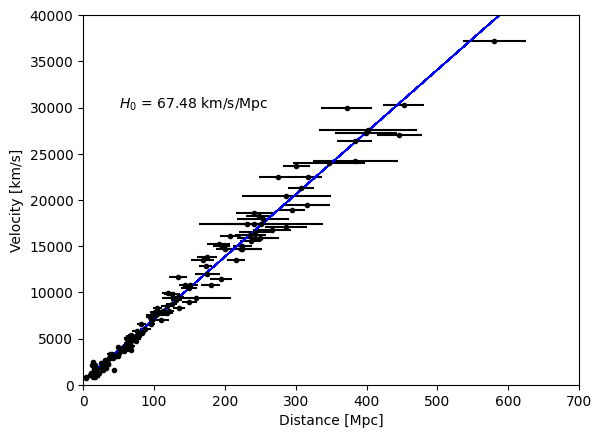

In [ ]:
plt.errorbar(distance.to(u.mpc).value, velocity.to(u.km / u.s).value, xerr=distance_error.to(u.mpc).value, marker=".", color="black", linestyle="none") # plot the data points
plt.plot(distance.to(u.mpc).value, velocity_model, color="blue", linewidth=1) # plot line of best fit
plt.xlim(0, 700) # limit the x axis to 700 Mpc
plt.ylim(0, 4e4) #limit the y axis to 4e4 km/s
plt.xlabel("Distance [Mpc]") # label the x axis as Distance [Mpc]
plt.ylabel("Velocity [km/s]") # label the y axis as Velocity [km/s]
plt.annotate(r"$H_0$ = {0:5.2f} km/s/Mpc".format(z[0]), xy=(50, 30000)) #write the H_0 found with the line

In [ ]:
H_0 = z[0] * u.km/u.s/u.Mpc # define H_0 as the slope of the line
print (H_0) # print the H_0 found below

67.48137250840927 km / (Mpc s)


In [ ]:
age = 1 / (H_0) # Formula for age of the universe (1/H)
print (age.to (u.Gyr)) # print the age found in Gyears

14.489809340480448 Gyr
